# Max Flow Lab

**Objectives:**
* Understand Ford-Fulkerson algorithm, in particular 
    - (use of) residual graphs
    - backward/forward edges
    - path in residual graph and minimum residual capacity
    - finding s,t-cut
* Intro to using Python
    - intro to NetworkX
    - using functions    
    
<font color='red'> **Comments in red** </font>

<font color='blue'> **Solutions in blue** </font>
    

## Part 1: Ford-Fulkerson (By Hand)

In the first part of the lab, we will solve a max flow instance using the algorithm you learned in class.  This will give you
practice using the *residual graph*.

Consider the following instance. The source (where the flow
comes from) is node 0 and the sink (where the flow goes to) is
node 6. The numbers on the arcs are the capacities. We would
like to push as much flow as we can from node 0 to node 6. So how do we start?

![title](images-lab/graph_1.png)

Let's pick a path that goes from 0  to 6 (if there is any), and push as much flow as possible through this path. Say we pick the path 0-1-4-6. 

**Q1:** How many units of flow can be pushed through this path?

**A:** <font color='blue'> The path is (0,1),(1,4),(4,6) which have capacities 4, 7, and 6. We can push flow up to the most restrictive capacity so 4 units of flow can be pushed. </font>

**Q2:** Is there an arc which got *saturated* (that is, no more flow can go through it)?

**A:** <font color='blue'> Yes, the arc (0,1) got saturated. </font>

Now, we write down the flow on the arcs (the flow is the number inside a box, the other is the capacity of the arc).

![title](images-lab/graph_2.png)

What would be the next step? We might think that it's a reasonable
idea to decrease the capacities on the arcs of the path by the amount
of flow we have just pushed through them, and start anew with the
resulting graph. But this greedy approach wouldn't let us reverse flow
on the arcs, and reversing flow is an essential part of the algorithm
as we have seen in lecture. So instead of just decreasing the
capacities on arcs that are on the *augmenting path*, we will
introduce new arcs that show how much flow can be sent in the reverse
direction between the nodes. We will draw all the original arcs that
are not yet saturated, and also reverse arcs between those nodes where
there is positive flow --- this flow can potentially be reversed. The resulting graph is called the *residual graph*.

So, for example, arc $(1,4)$ has remaining capacity
$7-4=3$, so we write this capacity on the arc in the residual graph.
Also, the flow of value 4 could be sent back from 4 to 1, so we draw the arc $(4,1)$ with capacity 4 in the
residual graph. Capacities on the arcs in the residual graph are
called *residual capacities*. Below is the residual graph that
corresponds to the flow in the graph. 

![title](images-lab/graph_3.png)

**Q3:** What are the residual capacities for arcs (2,4), (4,6), and (6,4)?
    
**A:** <font color='blue'> (2,4) has residual capacity $7-0 = 7$. (4,6) has residual capacity $6-4=2$ and (6,4) has residual capacity 4.</font>

**Q4:** Why is there no arc from 0 to 1 in the residual graph?

**A:** <font color='blue'> Because arc (0,1) is saturated so no more flow can be sent from 0 to 1, only in the reverse direction. </font>

The residual graph tells us which arcs can have more
flow pushed through them and in what direction. At each iteration,
we look for a path from the source to the sink in the residual graph. If we find
one, we can decrease flow on backwards arcs and increase flow on forwards arcs
along this path. Then, we redraw the residual graph, look for a
new path, and so on. When do we stop? If we can't find a path from
source to sink in the residual graph. Does this mean that we have
an optimal flow?  Yes, and the last residual graph lets us read
off a minimum cut that proves it.

**Q5:** Use the blank graphs below to finish the algorithm for this problem. 
At each step pick a path from 0 to 6 in the
residual graph (start with the residual graph above), determine how
much flow you can push through this path, draw the new flow on the
arcs of the graph on the left, and the residual graph into the "empty"
graph on the right. 

![title](images-key/q5_graph_1.png)
![title](images-key/q5_graph_2.png)
![title](images-key/q5_graph_3.png)
![title](images-key/q5_graph_4.png)

**Q6:** What is the value of the optimal flow? Did you use any reverse arcs to improve the flow?

**A:** <font color='blue'> The value of the optimal flow is $4+7=11$. The reverse arc (4,1) was used to improve flow. </font>

**Q7:**. Take a look at the last residual graph. Why did you stop? Which nodes can be reached by a directed path from the source in the residual graph? 

**A:** <font color='blue'> Stopped because there was no $s-t$ path in the residual graph. The set of nodes reachable from $s$ in the residual graph are $\{0,2\}$.</font>

**Q8:** Draw a *cut* in the last graph on the left between those nodes that are reachable from 0 and those that are not.

**A:** <font color='blue'> The cut is $S = \{0,2\}$ </font>

**Q9:** Add up the capacities on the arcs that cross the cut from the "source-side" to the "sink-side" (in the original graph). How does this value compare with the maximum flow? What can you now conclude about the flow you found? Give a short explanation.

**A:** <font color='blue'> The capacity of the cut is the capacity of the edges (0,1) and (2,4) which sums to 11. This value is equivalent to ther max flow. Hence, the flow must be the max flow and $\{0,2\}$ is a min-cut. This is because the flow must be less than or equal to any cut of the graph. </font>

## Part 2: Ford-Fulkerson (Python)

We will now use Python to help us run the Ford-Fulkerson algorithm. This lab is meant to give you a flavor of Python. We hope that the comments in the code (the lines that start with `#`) are sufficient to give an idea of what the Python commands are doing. You will not be required to code anything in this lab but you should pay attention to the code as you will make small modifcations or additions to code in future labs.

Note that you can run Python code in this notebook by pressing Ctrl-Enter when you have highlighted the cell with the code you want to run. You can also press Shift-Enter, to run the code, and highlight the next cell.

We start by defining the input in Python. We will use the package "NetworkX" to manipulate and display graphs. We will consider a new max flow instance. The nodes in this instance are numbered 1, 2, 3, 4, 5 and 6, and we want to find the maximum flow from node 1 to node 6.

Read the code below, and run it.

In [1]:
# REMINDER: Select this cell and press Shift+Enter to run it

# To use a package, we use the command "import" in Python
import networkx as nx

# G is directed graph 
G = nx.DiGraph() 

# We define G based on the edges, and the capacity on each edge.
# One way to do this is to specify a list of edges with each endpoint and the edge capacity.
# For instance, edge (1,2) has capacity 2, (1,3) has capacity 5, etc.
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]

# We create the graph based on this list.
G.add_weighted_edges_from(edgeList, 'cap')

# Each edge will have a flow associated with it. At the start of the algorithm, the flow on each edge is 0.
# We initialize this by iterating through the edges in a for-loop, and setting the attribute 'flow' to 0.
for i, j in G.edges:
    G.edges[i,j]['flow'] = 0

**NOTE**: Pay attention to the white space in the code: In Python, white space indentation is used to signal that these commands are part of the `for`-loop.

The code above initializes the graph, but it does not display anything. Let's run some code that shows what we are doing --- run the code below.

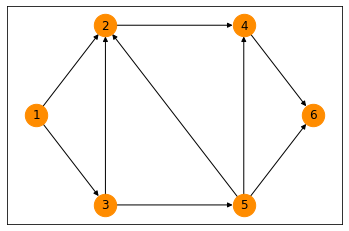

In [2]:
pos = ((0,0),(0,10),(10,20),(10,0),(30,20),(30,0),(40,10)) # node positions
nx.draw_networkx(G,pos,node_size=500,node_color='darkorange') # draw graph

As you can see, the flows and capacities are not displayed on the graph. To do this, you can run the following code.

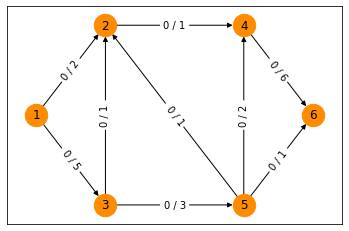

In [3]:
# define edge labels
label = {}
for i, j in G.edges:
    label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] )

nx.draw_networkx(G,pos,node_size=500,node_color='darkorange') # draw graph
nx.draw_networkx_edge_labels(G,pos,edge_labels=label); # draw labels

So this is the input that we want to run the Ford-Fulkerson algorithm on. As a reminder, every iteration of the algorithm works as follows:

- Create the residual graph $G_x$ based on the current flow
- Find a path in $G_x$ from $s$ to $t$ (here from 1 to 6)
    * If a path exists, update the flow
    * Otherwise you have found a Maximum Flow
    
So first we want to create the residual graph $G_x$. Recall that we create this graph by adding forward edges with residual capacity equal to the remaining capacity of the edge on which flow could be pushed and backward edges with residual capacity equal to the flow on that edge.

**Q10:** Assume we have a feasible flow. Consider an edge with capacity $c$ and flow $f$. What inequality must hold true for $c$ and $f$? Why?

**A:** <font color='blue'>$f \leq c$ because of the capcity constraint. </font>

**Q11:** Now, assume $f > 0$. What residual edges will be created? For each residual edge created, state weather the edge is a forwards or backwards edge and give its residual capacity in terms of $c$ and $f$.

**A:** <font color='blue'>Forwards edge with capcity $c-f$ and backwards edge with capcity $f$.</font>

The following code implements the logic you just described in **Q11**.

In [4]:
residualGraph = nx.DiGraph() # blank graph

for i, j in G.edges:
    c = G.edges[ i,j ]['cap'] # capcity on edge (i,j)
    f = G.edges[ i,j ]['flow'] # flow on edge (i,j)
    
    # if there is leftover capcity
    if( c > f ):
        residualGraph.add_edge(i,j)
        residualGraph.edges[i,j]['residual capacity'] = c-f
        residualGraph.edges[i,j]['forward edge'] = True 
     
    # if there is nonzero flow
    if ( f > 0 ):
        residualGraph.add_edge(j,i)
        residualGraph.edges[j,i]['residual capacity'] = f
        residualGraph.edges[j,i]['forward edge'] = False 

Now, the code below plots the residual graph

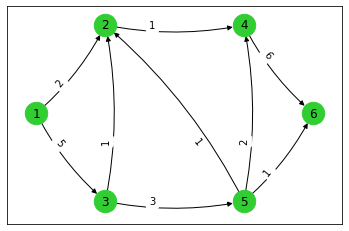

In [5]:
nx.draw_networkx(residualGraph,pos,node_size=500,node_color='limegreen',connectionstyle='arc3, rad=0.1')
residualcap = nx.get_edge_attributes( residualGraph, 'residual capacity' )        
nx.draw_networkx_edge_labels(residualGraph,pos,edge_labels=residualcap,label_pos=0.66);

The nodes are drawn in green as a visual reminder that we are looking at the residual graph. Also, the edges are drawn with a slight bend, because we know there will often be both an arc $(i,j)$ and $(j,i)$ in the residual graph. The residual capacities are given closer to the tail of the edges.

Let's now do an iteration of Ford-Fulkerson. 

**Q12:** Find a path from 1 to 6 in the residual graph, and define delta to be the minimum residual capacity of the edges in this path.

You can define a path in Python by listing the edges in the path as follows:

`path = [(1,2),(2,3)]` 

defines the path with edges (1,2) and (2,3).

In [6]:
# flowpath = []
# delta = 

#SOLUTION
flowpath = [(1,3),(3,5),(5,6)]
delta = 1

**Q13:** How will the flow change on the edges in the original graph with a corresponding forward edge in the s-t path in the residual graph? What about those with a corresponding backwards edge in the s-t path in the residual graph?

**A:** <font color='blue'> The flow on edges with a corresponding forward edge in the s-t path in the residual graph will increase by delta while the flow on edges with a corresponding backwards edge in the s-t path in the residual graph will decrease by delta </font>

The following code implements the logic you just described in **Q13**.

In [7]:
for i, j in flowpath:
    if residualGraph.edges[i,j]['forward edge']:
        G.edges[i,j]['flow'] = G.edges[i,j]['flow'] + delta
    else:
        G.edges[i,j]['flow'] = G.edges[i,j]['flow'] - delta

Now, we plot the new flow!

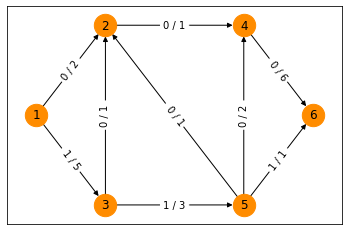

In [8]:
# define edge labels
label = {}
for i, j in G.edges:
    label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] )

nx.draw_networkx(G,pos,node_size=500,node_color='darkorange') # draw graph
nx.draw_networkx_edge_labels(G,pos,edge_labels=label); # draw labels

This concludes the first iteration of the Ford-Fulkerson Algorithm! Let's do this again! Did you notice we used the same code to plot the flow graph? When we have code we want to reuse, we should make a "function". You can do this in Python using the command `def`. As an example, let's define a function to plot the graph with the current flow, called `plot_flow`.

In [9]:
def plot_flow():
    # define edge labels
    label = {}
    for i, j in G.edges:
        label[(i,j)] = str( G.edges[i,j]["flow"] ) + " / " + str( G.edges[i,j]["cap"] )

    nx.draw_networkx(G,pos,node_size=500,node_color='darkorange') # draw graph
    nx.draw_networkx_edge_labels(G,pos,edge_labels=label); # draw labels

After running the code in the cell above, it now suffices to just type `plot_flow()` to see the current flow.

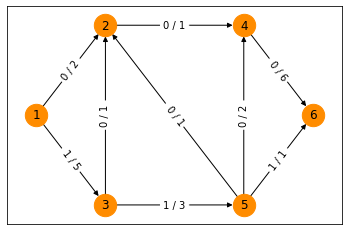

In [10]:
plot_flow()

Great! Let's do the same thing for plotting the residual graph. (The `global` keyword ensures the variable `residualGraph` has a scope outside the this function. Speaking of scope, this is outside the scope of this course).

In [11]:
def plot_residual_graph():

    global residualGraph
    
    residualGraph = nx.DiGraph() # blank graph

    for i, j in G.edges:
        c = G.edges[ i,j ]['cap'] # capcity on edge (i,j)
        f = G.edges[ i,j ]['flow'] # flow on edge (i,j)

        # if there is leftover capcity
        if( c > f ):
            residualGraph.add_edge(i,j)
            residualGraph.edges[i,j]['residual capacity'] = c-f
            residualGraph.edges[i,j]['forward edge'] = True 

        # if there is nonzero flow
        if ( f > 0 ):
            residualGraph.add_edge(j,i)
            residualGraph.edges[j,i]['residual capacity'] = f
            residualGraph.edges[j,i]['forward edge'] = False 
            
    nx.draw_networkx(residualGraph,pos,node_size=500,node_color='limegreen',connectionstyle='arc3, rad=0.1')
    residualcap = nx.get_edge_attributes( residualGraph, 'residual capacity' )        
    nx.draw_networkx_edge_labels(residualGraph,pos,edge_labels=residualcap,label_pos=0.66);

Again, we can now plot the residual graph using `plot_residual_graph()`

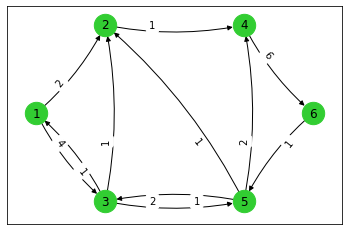

In [12]:
plot_residual_graph()

**NOTE:** The residual capacities are given closer to the tail of the edges than the head, again, because there will often be two edges between $i$ and $j$.

**Q14:** Find another 1 to 6 path in the residual graph, and find the minimum residual capacity of the edges on this path.

In [13]:
# flowpath = []
# delta = 

#SOLUTION
flowpath = [(1,2),(2,4),(4,6)]
delta = 1

Let's update the flow again. Again, we will reduce repeat code by introducing a function.

In [14]:
def update_flow():
    for i, j in flowpath:
        if residualGraph.edges[i,j]['forward edge']:
            G.edges[i,j]['flow'] = G.edges[i,j]['flow'] + delta
        else:
            G.edges[j,i]['flow'] = G.edges[j,i]['flow'] - delta

Run this cell to update the flow.

In [15]:
update_flow()

And run this cell to view the new flow graph.

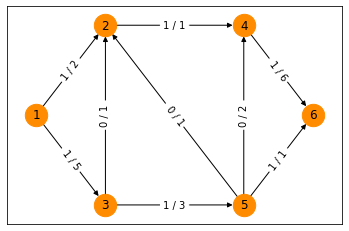

In [16]:
plot_flow()

Let's do another iteration! Here is the updated residual graph:

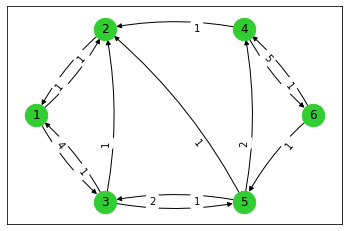

In [17]:
plot_residual_graph()

**Q15:** Find another path.

In [18]:
# flowpath = []
# delta = 

#SOLUTION
flowpath = [(1,3),(3,5),(5,4),(4,6)]
delta = 2

In [19]:
update_flow()

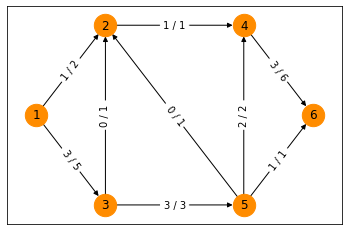

In [20]:
plot_flow()

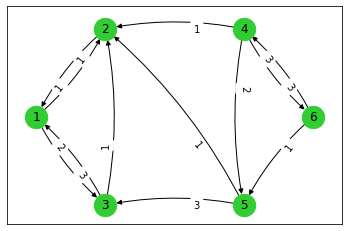

In [21]:
plot_residual_graph()

Did we find an optimal flow?  If you did the previous iterations correctly, there is no longer a path from 1 to 6 in the residual graph. Recall, this means that the flow is optimal, and you can show this by providing a cut that has capacity equal to the flow value. This cut can be found using a "Labeling algorithm" that maintains a list of checked nodes that it still needs to process. 

## Part 3: Labeling Algorithm 

### Labeling algorithm 
- Mark $s$ with a $\checkmark$. Let the list initially contain just node $s$.
- Until the list is empty:
    * Take any node (e.g., the first one) off of the list. Suppose that $i$ is the name of this node. For each arc leaving $i$, that is, each $(i,j) \in E_x$, if $j$ is unchecked, check it and add it to the list.

The nodes that have been checked are those nodes that are reachable from $s$ by a path in $G_x$. Note that the labeling algorithm is extremely similar to Dijkstra's shortest path algorithm. However, it does not care about distance, only if a node is reachable.

We implement the "labeling algorithm" below.

In [22]:
# uncheck all nodes except for 1
for i in G.nodes:
    G.nodes[i]["check"] = False
G.nodes[1]["check"] = True

# initialize the list of checked nodes that we still need to process
list = { 1 }

# until the list is empty
while ( len( list ) > 0 ):
    # take any node off of the list
    i = list.pop() 
    
    # for each arc in the residual graph leaving i
    for j in residualGraph.neighbors(i):
        # if j is unchecked        
        if not G.nodes[j]["check"]:
            G.nodes[j]["check"] = True  # check it
            list.add( j )  # and add it to the list

# output the checked nodes
for i in G.nodes:
    if G.nodes[i]["check"]:
        print( i )

1
2
3


**Q15:** What is the cut that the "labeling algorithm" finds? What is the capacity of the cut?

**A:** <font color='blue'> The cut the labeling algorithm finds is $S = \{1,2,3\}$ with capacity 4. </font>

We can modify the code to find a path in the residual graph if there is one, by keeping track of the node $i$ we came from when we first check a node $j$. We can do this by adding another attribute to the nodes, called "prev", and defining this in the algorithm. As soon as we encounter node 6 we can backtrack using "prev" to find the path.

We implement this idea below. Look for the slight change in implementation from the previous one.

In [23]:
def labeling_algorithm():
    # uncheck all nodes except for 1
    for i in G.nodes:
        G.nodes[i]["check"] = False
    G.nodes[1]["check"] = True

    # initialize the list of checked nodes that we still need to process
    list = { 1 }

    # until the list is empty
    while ( len( list ) > 0 ):
        # take any node off of the list
        i = list.pop() 

        # for each arc in the residual graph leaving i
        for j in residualGraph.neighbors(i):
            # if j is unchecked        
            if not G.nodes[j]["check"]:
                G.nodes[j]["check"] = True  # check it
                G.nodes[j]["prev"] = i  # set prev
                list.add( j )  # and add it to the list

Let's restart with the same graph again.

In [24]:
G = nx.DiGraph()  # blank directed graph
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]  # create edges / capacities
G.add_weighted_edges_from( edgeList, 'cap' )  # add edges / capacities to graph
for i, j in G.edges:
    G.edges[i,j]['flow'] = 0 # set flows to zero

Let's plot the flow and the residual graphs.

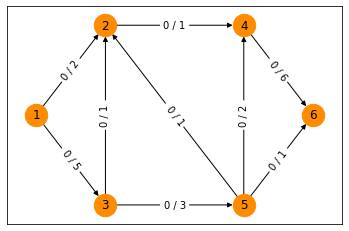

In [25]:
plot_flow()

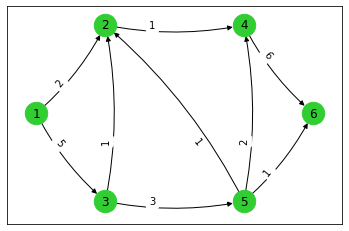

In [26]:
plot_residual_graph()

Before using our function `labeling_algorithm` to run the labeling algorithm on this instance, we will use a visual and interactive implementation.

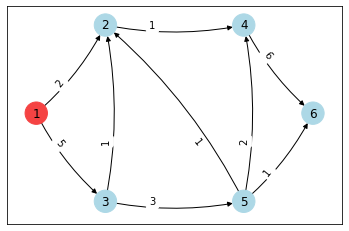

Unexplored nodes: {1}
Choose next node to explore: 1
Looking at node '1'. Its neighbors are [2, 3].
Node '2' now checked and prev set to '1'.
Node '3' now checked and prev set to '1'.


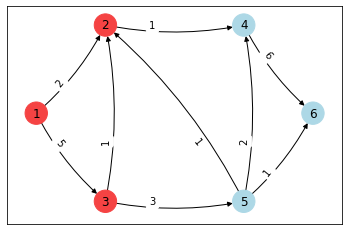

Unexplored nodes: {2, 3}
Choose next node to explore: 2
Looking at node '2'. Its neighbors are [4].
Node '4' now checked and prev set to '2'.


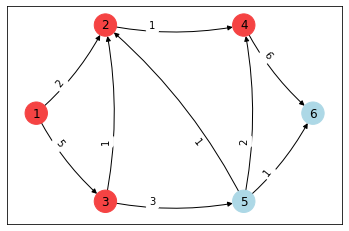

Unexplored nodes: {3, 4}
Choose next node to explore: 3
Looking at node '3'. Its neighbors are [2, 5].
Node '2' already checked.
Node '5' now checked and prev set to '3'.


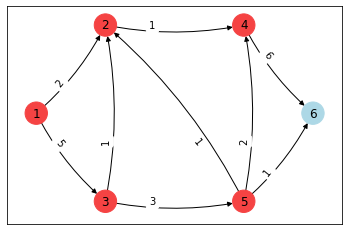

Unexplored nodes: {4, 5}
Choose next node to explore: 4
Looking at node '4'. Its neighbors are [6].
Node '6' now checked and prev set to '4'.


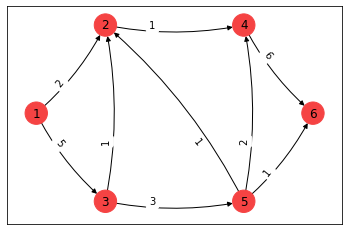

Unexplored nodes: {5, 6}
Choose next node to explore: 5
Looking at node '5'. Its neighbors are [2, 4, 6].
Node '2' already checked.
Node '4' already checked.
Node '6' already checked.


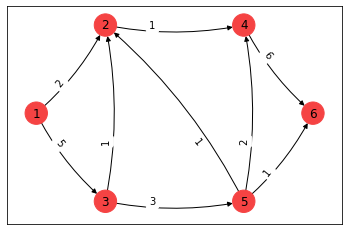

Unexplored nodes: {6}
Choose next node to explore: 6
Looking at node '6'. Its neighbors are [].


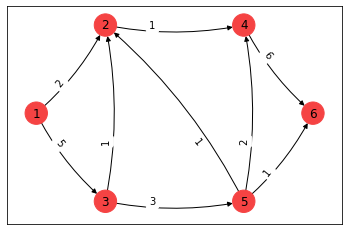

In [27]:
from max_flow import *

pos = ((0,0),(0,10),(10,20),(10,0),(30,20),(30,0),(40,10))
for i in range(1,7):
    G.nodes[i]['pos'] = pos[i]

ex = max_flow(G)
ex.label(s=1,auto=False,show=True)

Now let's use our implementation!

In [28]:
labeling_algorithm()

We can now use the atribute "check" to see whether node 6 is reachable from node 1 in the residual graph.

In [29]:
print(G.nodes[6]["check"])

True


**Q16:** Is node 6 reachable from node 1 in the residual graph? Why?

<font color='blue'> Yes, it was checked off after running the labeling algorithm.</font>

Let's use the "prev" attribute to find a path from 1 to 6 in the residual graph. Run the cell to generate the augmenting path in the residual graph.

In [30]:
j = 6
flowpath = []
while j != 1:
    i = G.nodes[j]["prev"]
    flowpath.insert( 0, (i,j) )
    j = i
print(flowpath)

[(1, 2), (2, 4), (4, 6)]


And let's find the minimum residual capacity on this path. First, we can get a list of the residual capcities for  every edge in the path. Then, we use `min` to find the smallest which we call delta.

In [31]:
path_capacities = [residualGraph.edges[i,j]['residual capacity'] for i,j in flowpath]
print(path_capacities)
delta = min(path_capacities)
print(delta)

[2, 1, 6]
1


Now we can use the function defined earlier to update the flow!

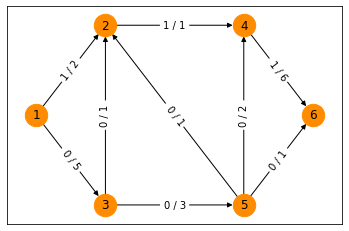

In [32]:
update_flow()
plot_flow()

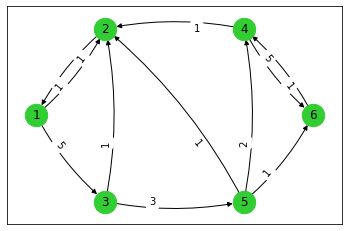

In [33]:
plot_residual_graph()

Let's run the labelling algorithm again.

In [34]:
labeling_algorithm()

Let's define a new function to find and print an $s-t$ path in the residual graph and its corresponding delta.

In [35]:
def print_path_and_delta():
    global flowpath, delta
    
    j = 6
    flowpath = []
    while j != 1:
        i = G.nodes[j]["prev"]
        flowpath.insert( 0, (i,j) )
        j = i
    print(flowpath)
    
    path_capacities = [residualGraph.edges[i,j]['residual capacity'] for i,j in flowpath]
    delta = min(path_capacities)
    print(delta)

Run this cell to make sure your function works as expected.

In [36]:
print_path_and_delta()

[(1, 3), (3, 5), (5, 6)]
1


Let's update the flow again.

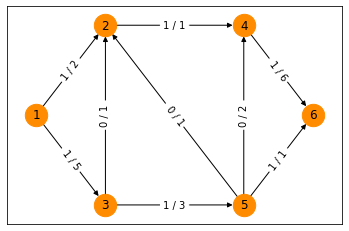

In [37]:
update_flow()
plot_flow()

In [38]:
print_path_and_delta()

[(1, 3), (3, 5), (5, 6)]
1


# Part 4: Putting Everything Together

You're probably getting a bit sick from pressing Shift-Enter every time. Let's automate the procedure!

In [39]:
import matplotlib.pyplot as plt

def ford_fulkerson(G):
    for i, j in G.edges:
        G.edges[i,j]['flow'] = 0

    plot_residual_graph() # plot the residual graph
    labeling_algorithm() # run the labeling algorithm to find a s-t path in the residual graph
    while G.nodes[6]["check"]: # while there is an s-t path in the residual graph
        plt.figure()
        print_path_and_delta() # show it
        update_flow() # update the flow
        plot_residual_graph() # plot the new residual graph
        labeling_algorithm() # run the labeling algorithm to find a s-t path in the new residual graph

[(1, 2), (2, 4), (4, 6)]
1
[(1, 3), (3, 5), (5, 6)]
1
[(1, 3), (3, 5), (5, 4), (4, 6)]
2


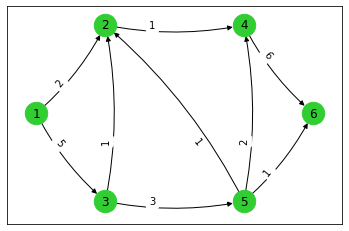

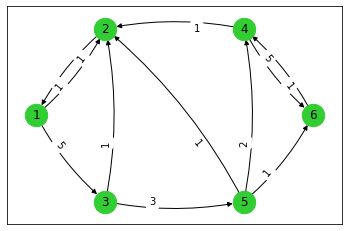

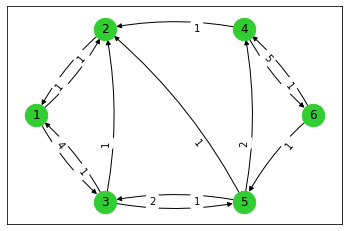

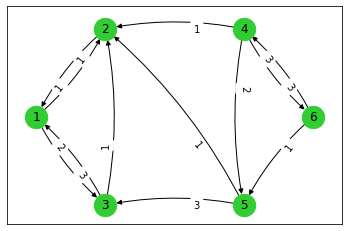

In [40]:
# define the input graph
G = nx.DiGraph() 
edgeList = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]
G.add_weighted_edges_from( edgeList, 'cap' )

# run Ford-Fulkerson
ford_fulkerson(G)

Let's have a look at the maximum flow.

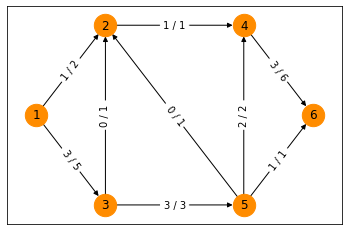

In [41]:
plot_flow()

Use the visual/interactive labeling algorithm to identify the checked nodes.

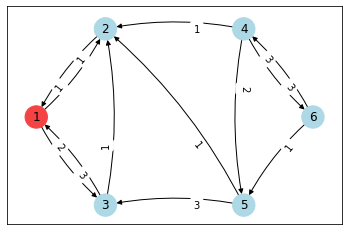

Unexplored nodes: {1}
Choose next node to explore: 1
Looking at node '1'. Its neighbors are [2, 3].
Node '2' now checked and prev set to '1'.
Node '3' now checked and prev set to '1'.


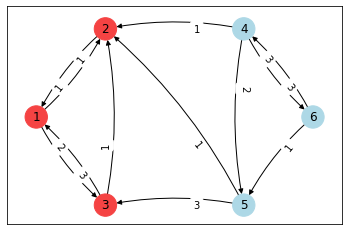

Unexplored nodes: {2, 3}
Choose next node to explore: 2
Looking at node '2'. Its neighbors are [1].
Node '1' already checked.


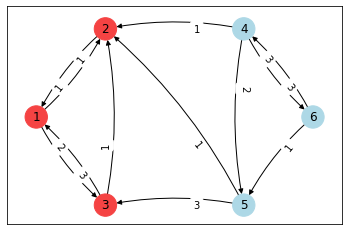

Unexplored nodes: {3}
Choose next node to explore: 3
Looking at node '3'. Its neighbors are [1, 2].
Node '1' already checked.
Node '2' already checked.


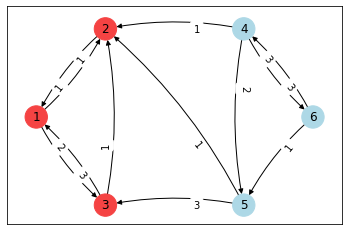

In [42]:
from max_flow import *

pos = ((0,0),(0,10),(10,20),(10,0),(30,20),(30,0),(40,10))
for i in range(1,7):
    G.nodes[i]['pos'] = pos[i]

ex = max_flow(G)
ex.ford_fulkerson(s=1, t=6, show=False)
ex.label(s=1, auto=False, show=True)

**Q17:** Which nodes were checked in the last run of the labeling algorithm? Use this to give a minimum cut. What is its value? How does it relate to the value of the optimal flow?

<font color='blue'> A minimum cut is $S = \{1,2,3\}$ with value 4 which equals the value of the optimal flow.</font>

We have now implemented the Ford-Fulkerson algorithm in Python! With a few more tweaks you could use this on any graph.

**Bonus:** You have seen all the ingredients necessary to also implement Dijkstra's algorithm for the Shortest Path Problem. Implement this algorithm in Python.